In [2]:
# for data Analysis
import pandas as pd
import numpy as np

# for Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#counting
from collections import Counter 

In [3]:
# load Data

data= pd.read_csv(r"C:\Users\value\Documents\10alytics projects\python\bank.csv")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  deposit    45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
data.shape

(45211, 17)

In [6]:
# check for missing values
print(data.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


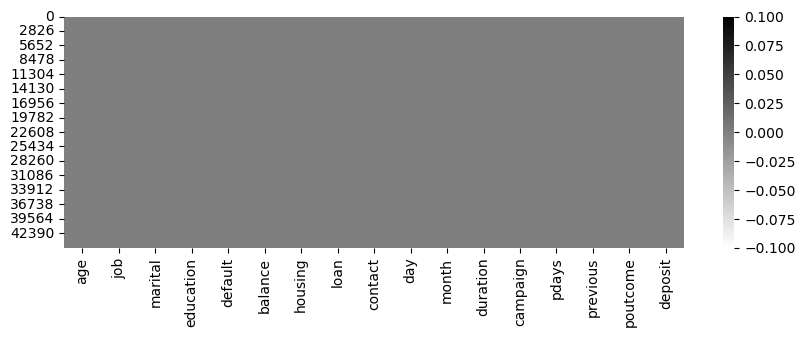

In [7]:
# visualizing missing data 
plt.figure(figsize = (10,3))
sns.heatmap(data.isnull(), cbar=True, cmap="gray_r");

In [8]:
# check for duplicates
print(data.duplicated().sum())

0


In [10]:
# check for not a number
data['month'].isna().sum()

0

In [11]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [12]:
ed = data['education'].unique()
po = data['poutcome'].unique()
jb = data['job'].unique()

print(ed,po,jb)

['tertiary' 'secondary' 'unknown' 'primary'] ['unknown' 'failure' 'other' 'success'] ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']


In [13]:
# numerial statistics
data.describe().round()

,age,balance,day,duration,campaign,pdays,previous
count,45211.0,45211.0,45211.0,45211.0,45211.0,45211.0,45211.0
mean,41.0,1362.0,16.0,258.0,3.0,40.0,1.0
std,11.0,3045.0,8.0,258.0,3.0,100.0,2.0
min,18.0,-8019.0,1.0,0.0,1.0,-1.0,0.0
25%,33.0,72.0,8.0,103.0,1.0,-1.0,0.0
50%,39.0,448.0,16.0,180.0,2.0,-1.0,0.0
75%,48.0,1428.0,21.0,319.0,3.0,-1.0,0.0
max,95.0,102127.0,31.0,4918.0,63.0,871.0,275.0


In [14]:
# categorical statistics
data.describe(include=['object','bool'])

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In [15]:
data.isnull()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45207,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45208,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45209,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
data[data.isnull().any(axis=1)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit


In [17]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [18]:
# Grouping the balance

def balance_group(x):
    if x < 0:
        return 'Indebt'
    elif x <= 10000:
        return 'less than 10000'
    elif x <= 50000:
        return 'less than 50000'
    elif x <= 100000:
        return 'less than 100000'
    else:
        return '>=100000 and above'
# Apply function to the data

data['balance_group'] = data['balance'].apply(balance_group)
data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,balance_group
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,less than 10000
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,less than 10000
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,less than 10000
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,less than 10000
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,less than 10000


blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
Name: job, dtype: int64


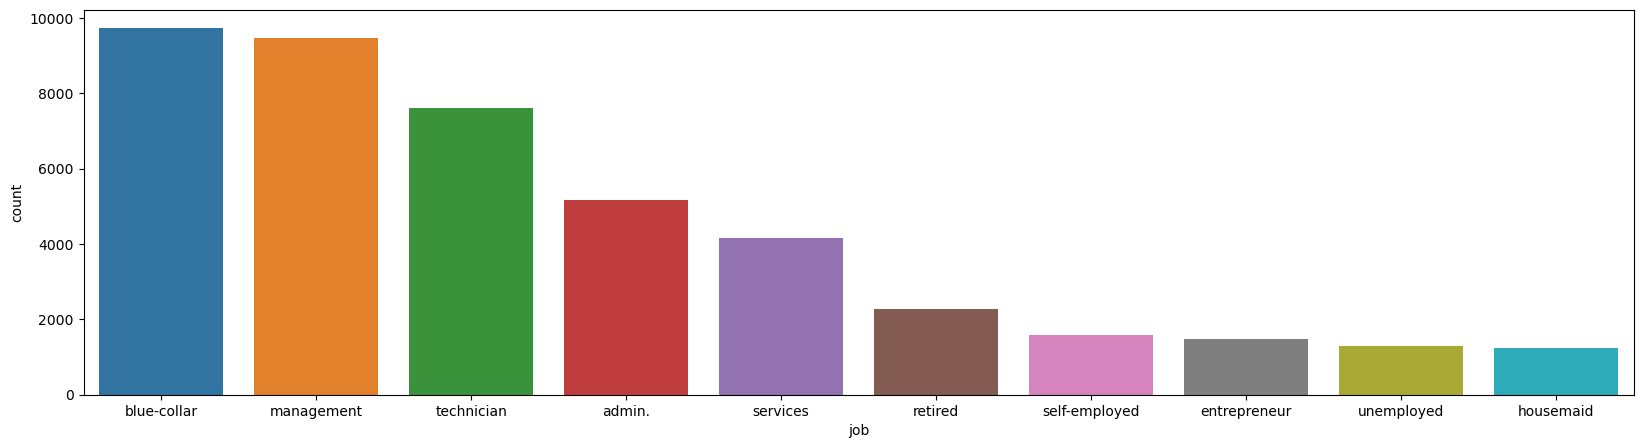

In [19]:
# top 10 jobs
plt.figure(figsize=(20,5))
topten = data['job'].value_counts().head(10)
sns.countplot(x='job', data=data, order=topten.index);
print(topten)

In [21]:
# Grouping the age

def age_group(x):
    if x <= 37:
        return '<=37 Youth'
    elif x <= 57:
        return '38-57 Adult'
    elif x <= 77:
        return '58-77 Old Adult'
    else:
        return '>=77 Aged'
# Apply function to the data

data['age_group'] = data['age'].apply(age_group)
data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,balance_group,age_group
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,less than 10000,58-77 Old Adult
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,less than 10000,38-57 Adult
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,less than 10000,<=37 Youth
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,less than 10000,38-57 Adult
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,less than 10000,<=37 Youth


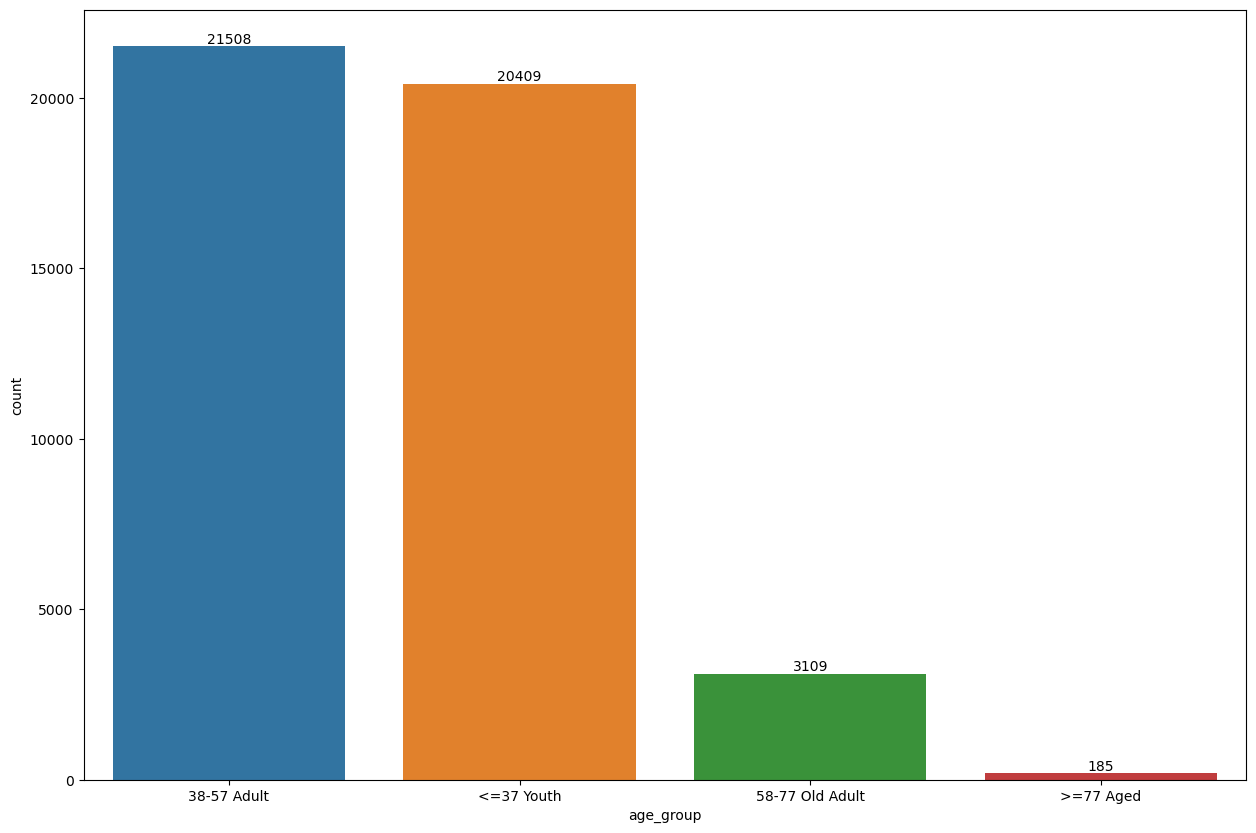

In [23]:
# count by age group
plt.figure(figsize=(15,10))
ax = sns.countplot(x=data['age_group'], 
                  order=data['age_group'].value_counts(ascending=False).index)
values = data['age_group'].value_counts(ascending=False)                  
ax.bar_label(container=ax.containers[0], labels=values);

In [24]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit', 'balance_group', 'age_group'],
      dtype='object')

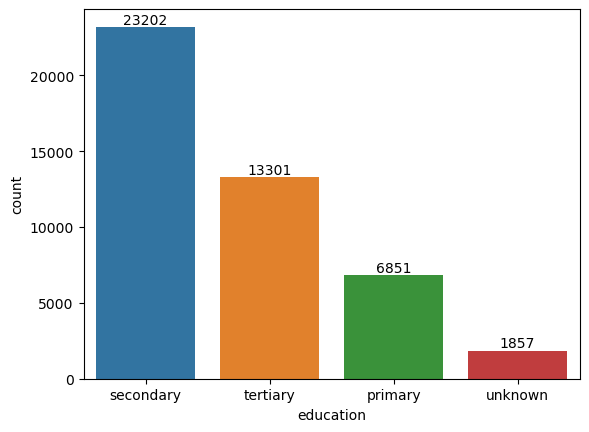

In [25]:
# count by education
ax = sns.countplot(x=data['education'],
                  order=data['education'].value_counts(ascending=False).index)
values = data['education'].value_counts(ascending=False,)
ax.bar_label(container=ax.containers[0], labels=values);


Observation:
Secondary education has the highest number of customer with value of 23202 followed by tertiary 13301 and the primary is 6852.
we have an unknowm customer.

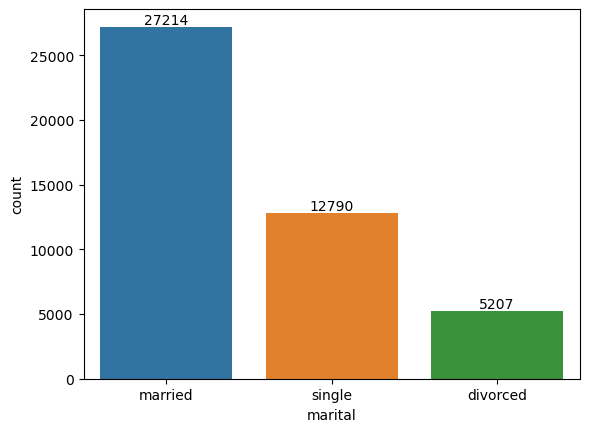

In [26]:
# count by marital status

ax = sns.countplot(x=data['marital'], 
                  order=data['marital'].value_counts(ascending=False).index)
values = data['marital'].value_counts(ascending=False)
ax.bar_label(container=ax.containers[0], labels=values);

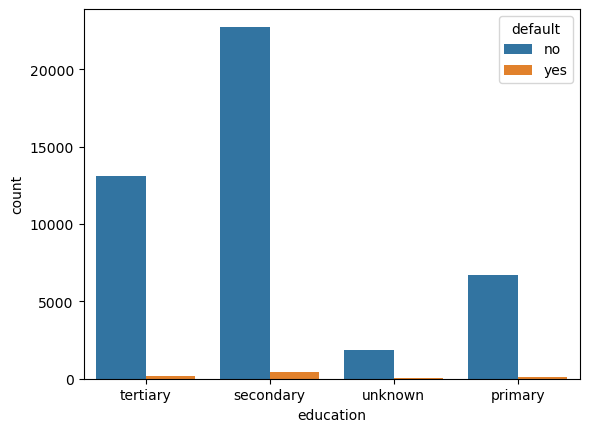

In [27]:
#df = data.groupby('age_group')[['deposit_tf','default_tf']].sum().reset_index()
#df = pd.melt(df, id_vars='age_group', var_name='Metric', value_name='Total')
#sns.barplot(data=df, x='age_group', y='Total', hue='Metric');

df=sns.countplot(x='education', data=data, hue='default')

blue-collar    9732
management     9458
technician     7597
admin.         5171
services       4154
Name: job, dtype: int64


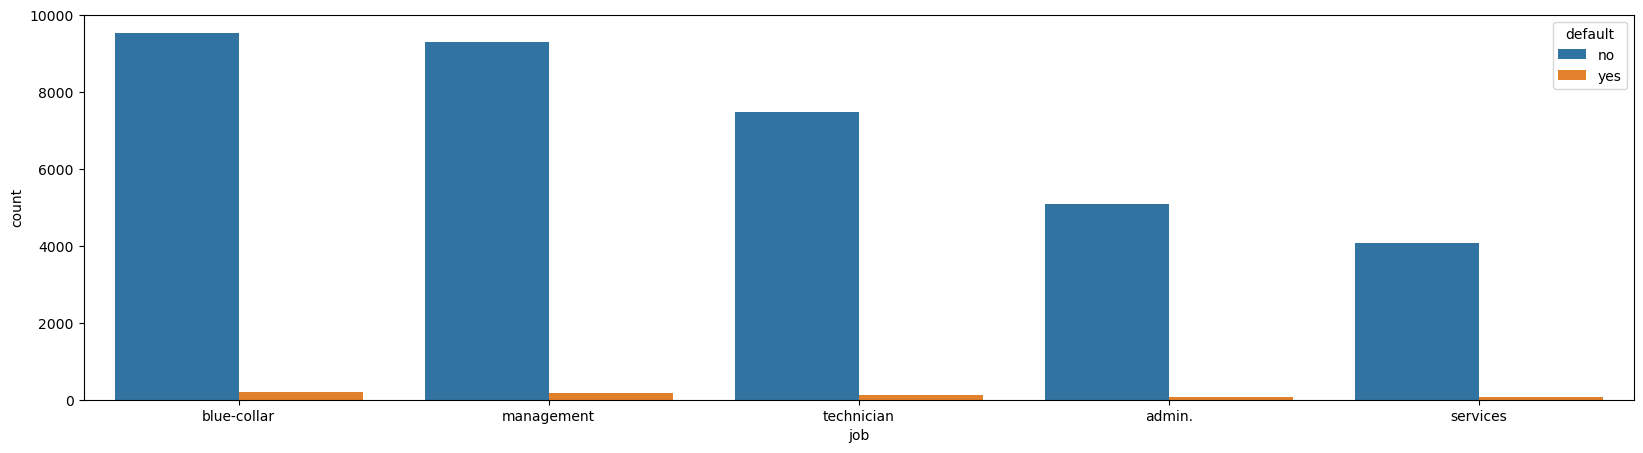

In [28]:
# top 10 jobs
plt.figure(figsize=(20,5))
topten = data['job'].value_counts().head(5)
sns.countplot(x='job', data=data,hue='default', order=topten.index);
print(topten)

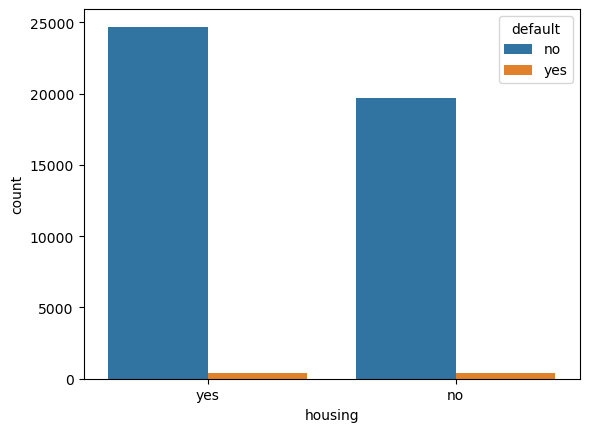

In [29]:
# count by marital status

df=sns.countplot(x='housing', data=data, hue='default')

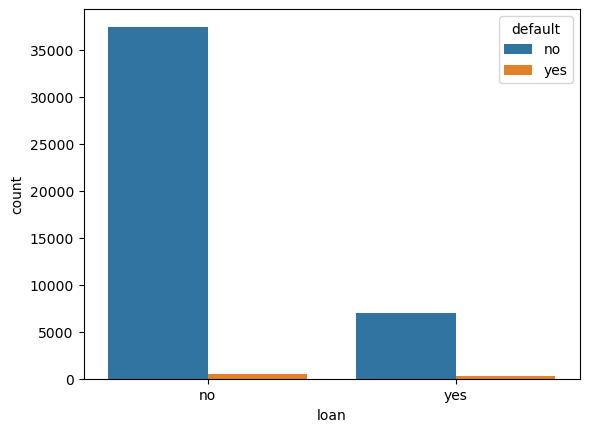

In [30]:
df=sns.countplot(x='loan', data=data, hue='default')

38-57 Adult        21508
<=37 Youth         20409
58-77 Old Adult     3109
>=77 Aged            185
Name: age_group, dtype: int64


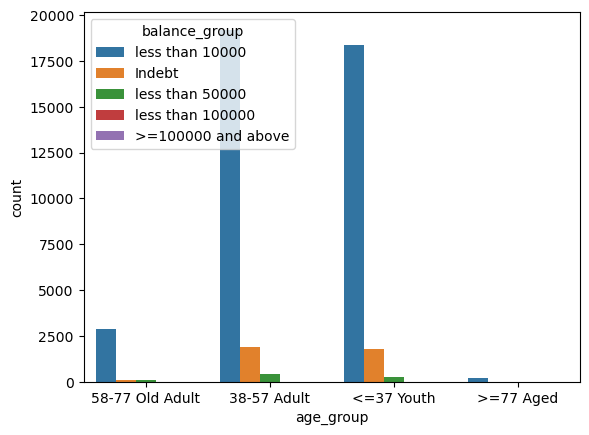

In [31]:
df=sns.countplot(x='age_group', data=data, hue='balance_group')
topten = data['age_group'].value_counts().head(5)
print(topten)

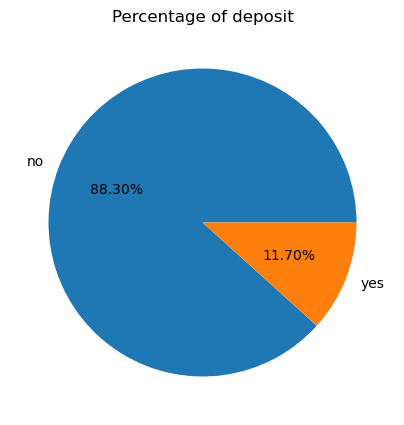

In [32]:
# percentage by deposit

fig,ax = plt.subplots(figsize=(5,5))
count = Counter(data['deposit'])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
ax.set_title('Percentage of deposit')
plt.show();

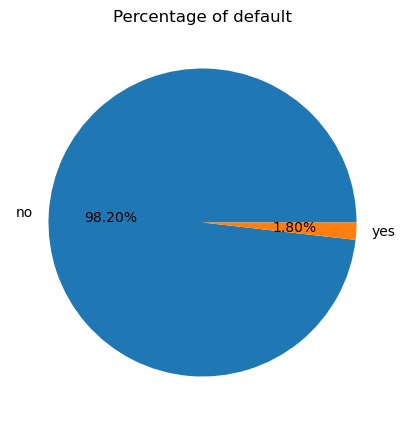

In [33]:
# percentage by loan

fig,ax = plt.subplots(figsize=(5,5))
count = Counter(data['default'])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
ax.set_title('Percentage of default')
plt.show();

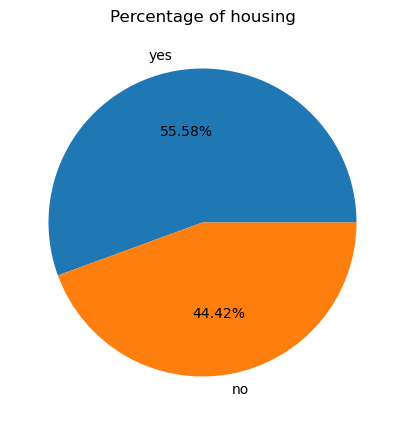

In [34]:
# peercentage of housing

fig,ax = plt.subplots(figsize=(5,5))
count = Counter(data['housing'])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
ax.set_title('Percentage of housing')
plt.show();

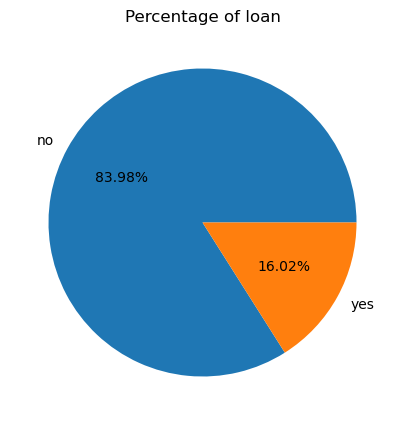

In [35]:
# percentage of housing

fig,ax = plt.subplots(figsize=(5,5))
count = Counter(data['loan'])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
ax.set_title('Percentage of loan')
plt.show();

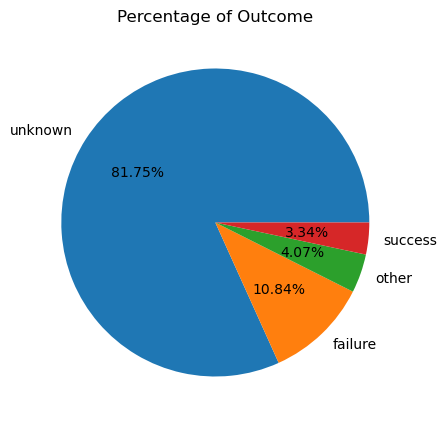

In [36]:
# percentage of outcome

fig,ax = plt.subplots(figsize=(5,5))
count = Counter(data['poutcome'])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
ax.set_title('Percentage of Outcome')
plt.show();

In [37]:
data['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

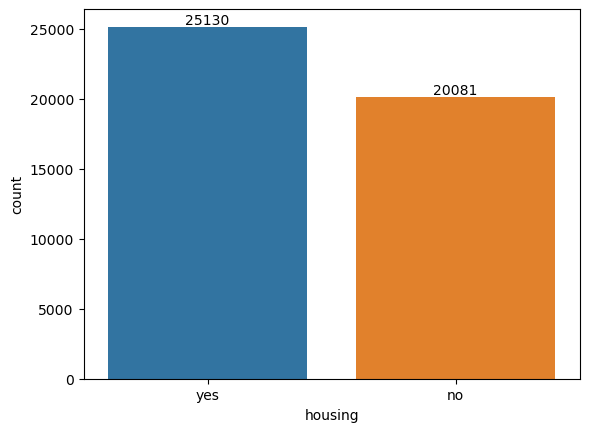

In [38]:
# count by housing loan

ax = sns.countplot(x=data['housing'],
                  order=data['housing'].value_counts(ascending=False).index)
values = data['housing'].value_counts(ascending=False)
ax.bar_label(container=ax.containers[0], labels=values);

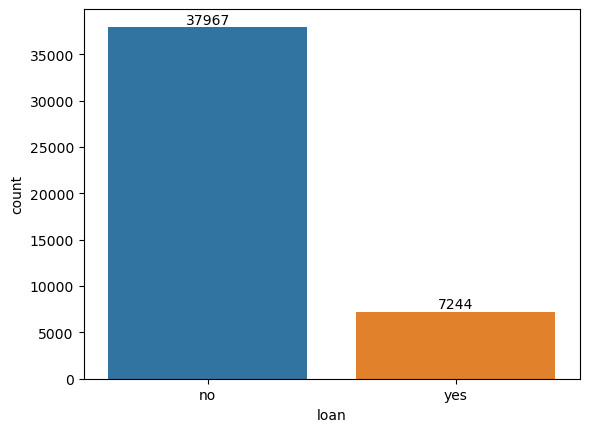

In [39]:
# count by personal loan

ax = sns.countplot(x=data['loan'], 
                  order=data['loan'].value_counts(ascending=False).index)
values = data['loan'].value_counts(ascending=False)
ax.bar_label(container=ax.containers[0], labels=values);

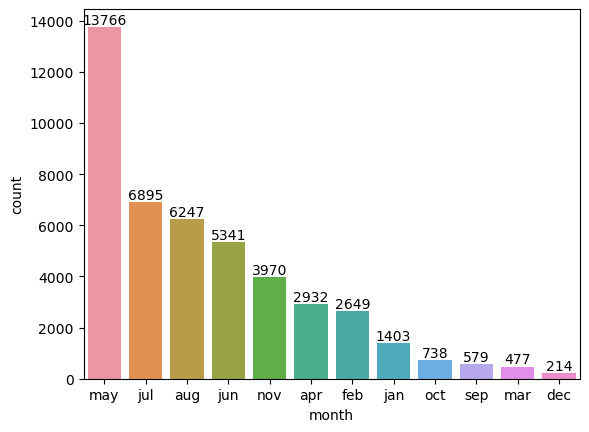

In [40]:
ax = sns.countplot(x=data['month'], 
                  order=data['month'].value_counts(ascending=False).index)
values = data['month'].value_counts(ascending=False)
ax.bar_label(container=ax.containers[0], labels=values);

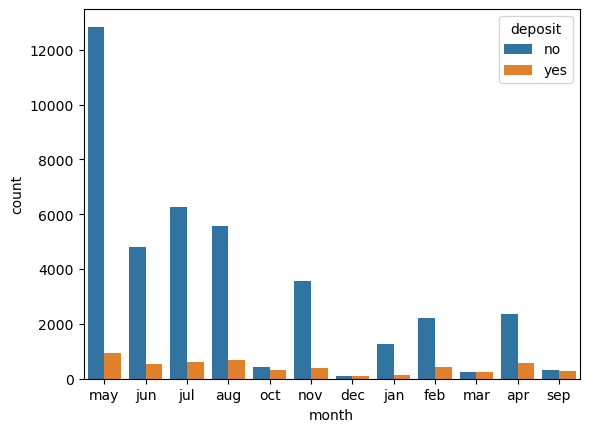

In [41]:
df=sns.countplot(x='month', data=data, hue='deposit')

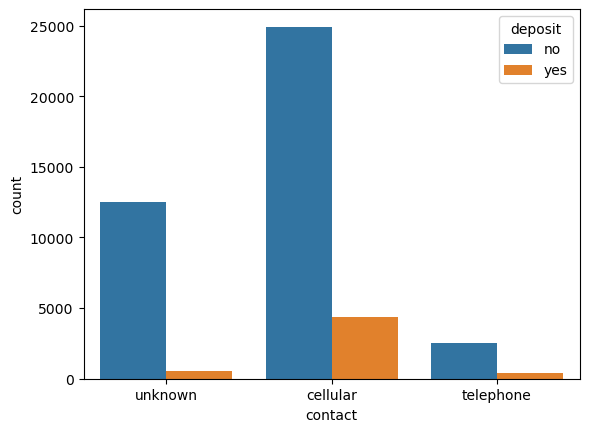

In [42]:
df=sns.countplot(x='contact', data=data, hue='deposit')

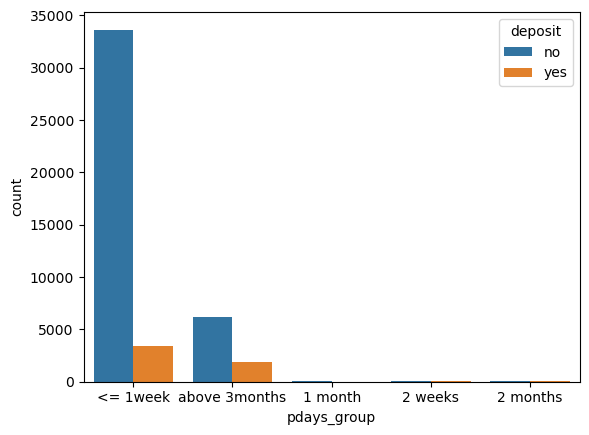

In [43]:
# Grouping the age

def pdays_group(x):
    if x <= 7:
        return '<= 1week'
    elif x <= 14:
        return '2 weeks'
    elif x <= 30:
        return '1 month'
    elif x <= 60:
        return '2 months'
    else:
        return 'above 3months'
# Apply function to the data

data['pdays_group'] = data['pdays'].apply(pdays_group)
data.head(5)

df=sns.countplot(x='pdays_group', data=data, hue='deposit')

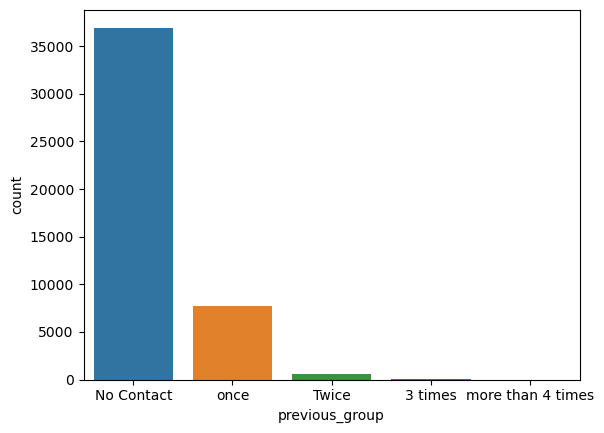

In [44]:
# Grouping the previous

def previous_group(x):
    if x <= 0:
        return 'No Contact'
    elif x <= 7:
        return 'once'
    elif x <= 30:
        return 'Twice'
    elif x <= 60:
        return '3 times'
    else:
        return 'more than 4 times'
# Apply function to the data

data['previous_group'] = data['previous'].apply(previous_group)
data.head(5)

df=sns.countplot(x='previous_group', data=data)

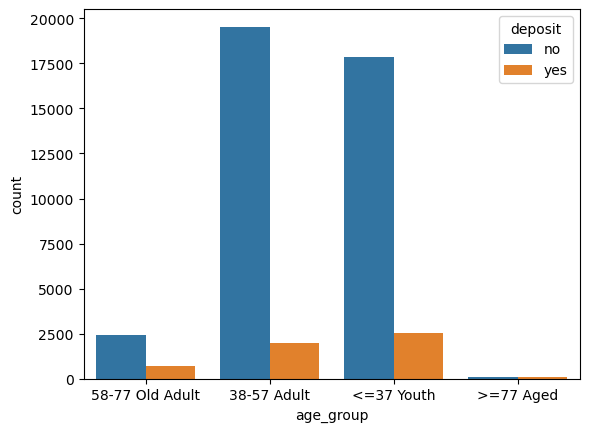

In [45]:
#deposit against age
df=sns.countplot(x='age_group', data=data, hue='deposit')

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
Name: job, dtype: int64


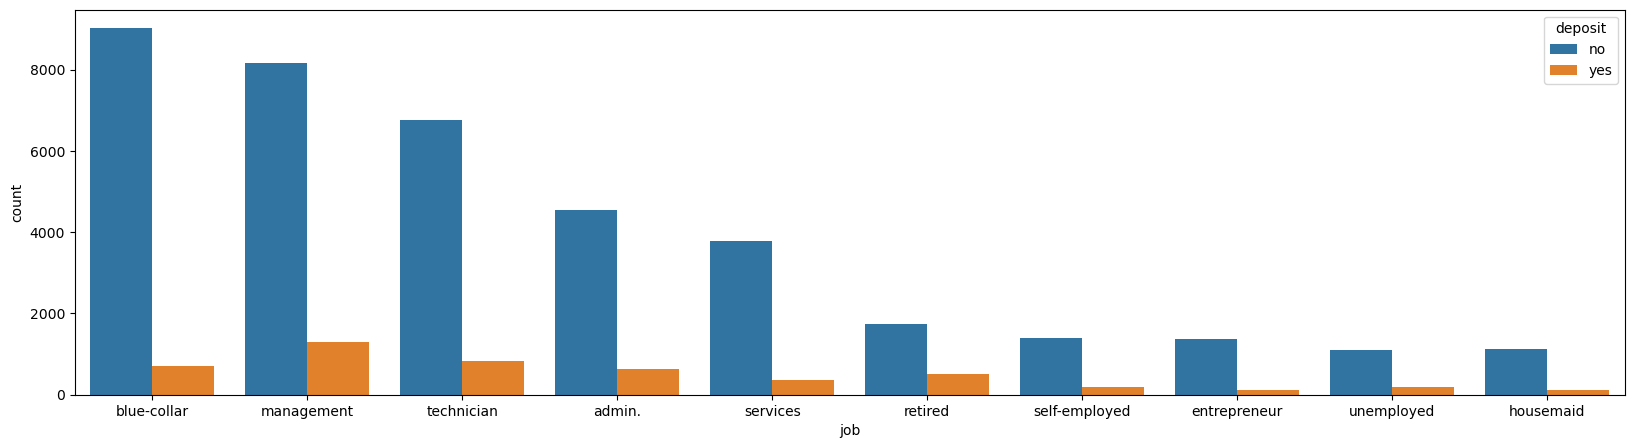

In [57]:
# top 10 jobs against deposit
plt.figure(figsize=(20,5))
topten = data['job'].value_counts().head(10)
sns.countplot(x='job', data=data,hue='deposit', order=topten.index);
print(topten)

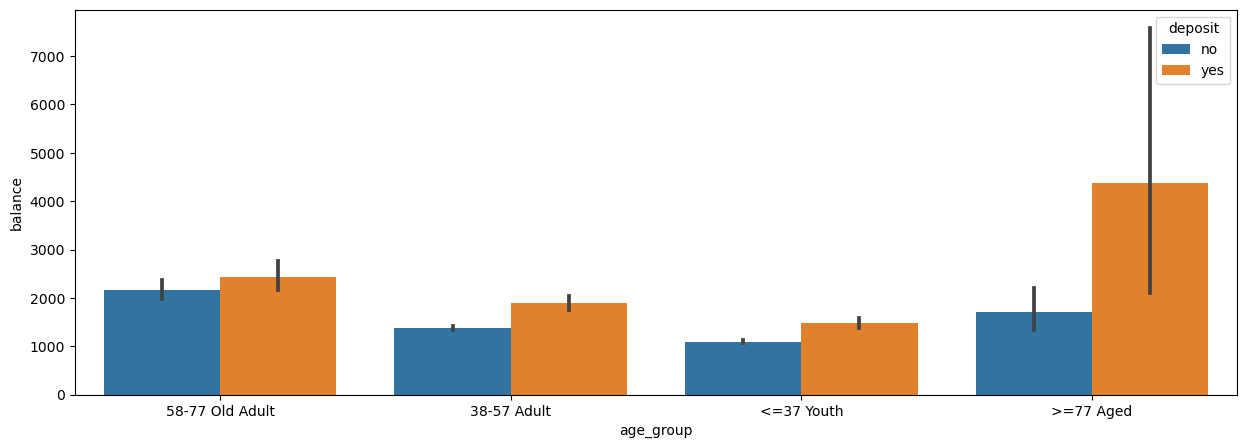

In [56]:
# customer gender, age group and profit
plt.figure(figsize=(15,5))
sns.barplot(x='age_group', y='balance', data=data, hue='deposit');

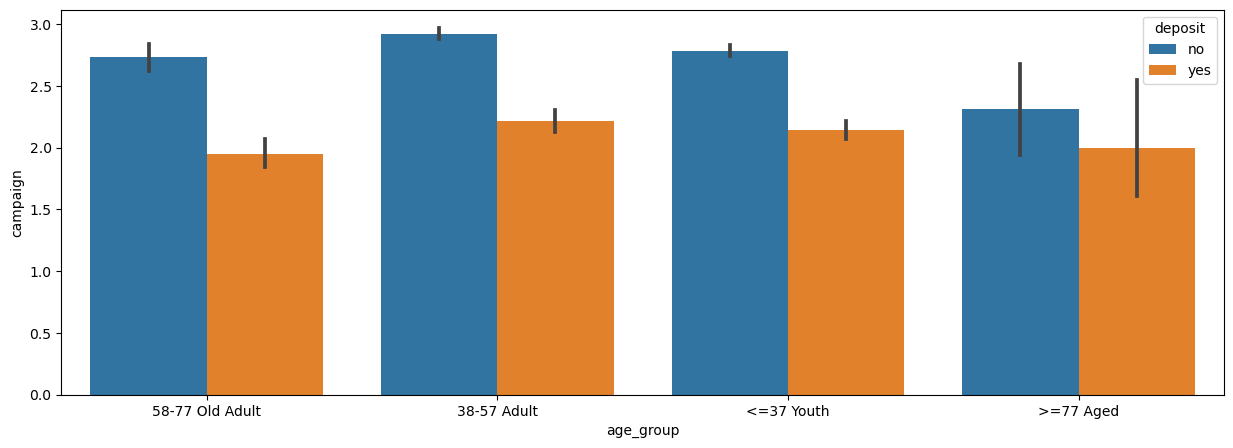

In [55]:
# customer gender, age group and profit
plt.figure(figsize=(15,5))
sns.barplot(x='age_group', y='campaign', data=data, hue='deposit');

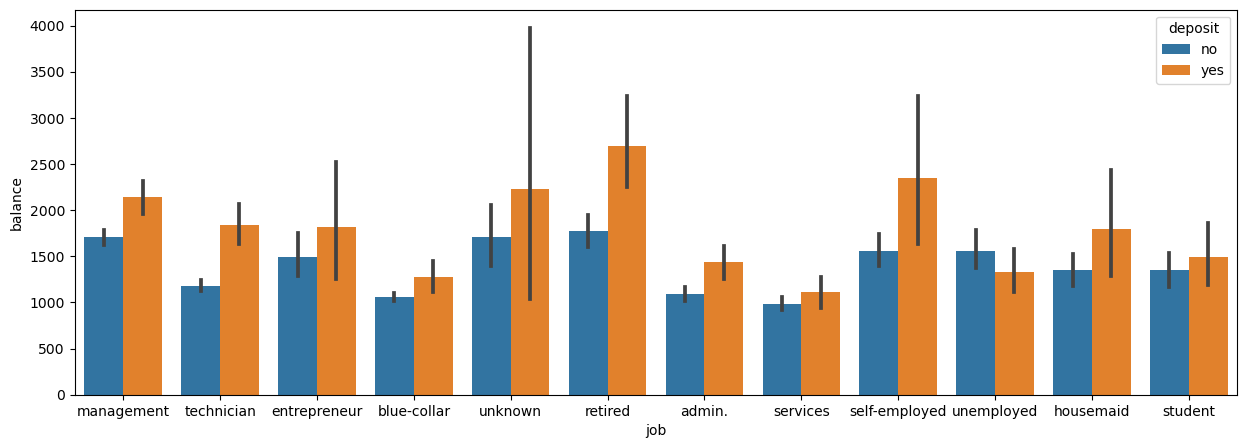

In [49]:
# job, balannce and deposit
plt.figure(figsize=(15,5))
sns.barplot(x='job', y='balance', data=data, hue='deposit');

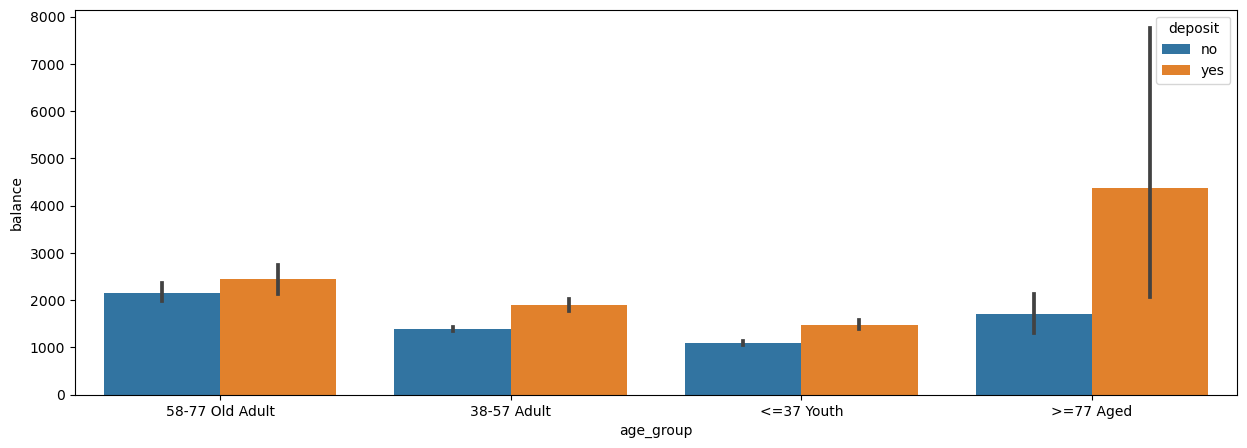

In [50]:
# age_group, balance and deposit
plt.figure(figsize=(15,5))
sns.barplot(x='age_group', y='balance', data=data, hue='deposit');

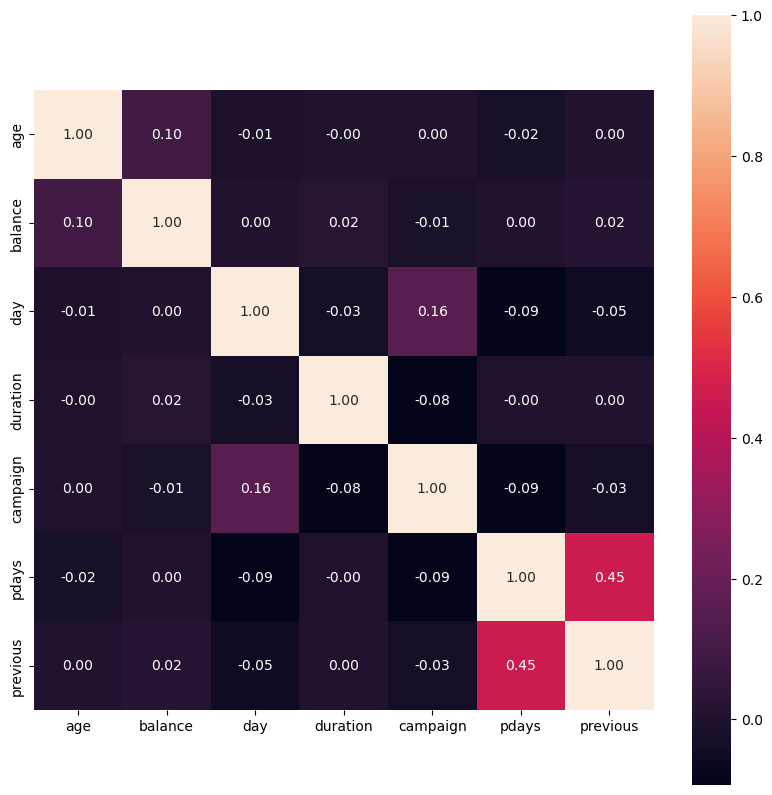

In [51]:
# correlation

plt.figure(figsize = (10,10))

hm = sns.heatmap(data.corr(), cbar=True, annot=True, square=True, fmt='.2f', 
                 annot_kws={'size':10})